# Monte Carlo Methods for Risk Management

# 1. Value at Risk

##### Risk Metrics

A technique for quantifying the risk in a portfolio is known as a risk metric. This gives us a way of numerically describing the amount of uncertainty in that portfolio.

Examples: Volatility/Variance and Correlation which give an idea of the extent to which a portfolio's value could decrease and how susceptible it is to massive swings in value.

However, to fully characterize these risks, we would need the distribution of returns to be multivariate normal (very unlikely). Therefore, we use a general metric as described below.

##### Value at Risk (VaR)

Value at Risk gives an indication of how much you stand to lose on a portfolio with a given probability, over a specific time period. This can be measured in absolute terms (we could lose $100 in portfolio value) or in relative terms (the value of our portfolio will decrease by 5%).

Let our current portfolio value be $X(t)$, then we can define the return on the portfolio until some fixed time T as:

$$ R_{t,T} = \frac{X(T-t) - X(t)}{X(t)} $$

### Definition of VaR using Alpha-Quantile of a Distribution

We can define the $\alpha$-quantile of a distribution, $x_{\alpha}(t,T)$ as:

$$ P[R_{t,T} < x_{\alpha}(t,T)] $$

which translates into our VaR values being:

$$VaR_{\alpha}(t,T) = \begin{cases}
               -x_{\alpha}(t,T)\\
                x_{\alpha}(t,T)X(t)\\
            \end{cases} $$

We can interpret VaR as being a quantile value: what values does the portfolio take on in the worst 5% of cases? We can also interpret this in terms of confidence intervals. We are (1 − α)-percent certain that the value of the portfolio will not fall below 𝑉𝑎𝑅$_{\alpha}$(𝑡, 𝑇).

**N.B.** the definition of VaR is the negative of a quantile such that the actual VaR value is positive

##### Example:

For example, suppose we have a portfolio that is worth 100 USD. Say we know that there is a 5% chance that the portfolio will have a value of 20 USD or less. Then the 5% VaR for the portfolio is 80 USD, or 80%. We are 95% confident that the value of our portfolio will not fall by more than 80 USD.

This changes according to the significance level chosen.

### Expected Shortfall

Other names for this include conditional VaR or expected tail loss. Expected shortfall tells us how much we stand to lose assuming that our portfolio value does actually fall below our VaR. Put more simply, it is how much we stand to lose, on average, if we only consider the worst α-percentile of cases.

$$ EL_{\alpha}(t,T) = - E[R_{t,T} | R_{t,T} < -VaR_{\alpha}(t,T)]\times X(t) $$

Which is the negative of our expected return, given the expected return is less than the VaR, multiplied by the portfolio value. Note that this means that we are dealing with absolute terms, and not relative terms.

**N.B.** the VaR value must also be in terms of the portfolio returns, and not the portfolio value.

## Calculating VaR

### a. Monte Carlo VaR Models

Monte Carlo VaR models make use of Monte Carlo methods to project asset values, in order to get some idea of what happens to your portfolio value in the future. In doing so, you will be able to build a distribution for your portfolio value. You can then use this distribution to estimate the α- percentile of the portfolio, and to estimate a VaR.

- Determine dynamics for the assets in the portfolio



- Use Monte Carlo simulation to simulate the value of these assets n-days into the future



- Determine the portfolio value in each scenario



- Determine the $\alpha$-quantile of these projected portfolio values


Monte Carlo methods don't fall prey to data history issues once you have calibrated your return model; but a model needs to be implied which immediately introduces model risk into your VaR estimate.

**Monte Carlo simulation tries to find a balance between what has happened in the past, and what could potentially happen in the future. It makes use of models which can allow for events which haven't explicitly occurred before, and it also uses historical data to calibrate its model parameters, which allows for it to incorporate what has happened in the past into its estimates.**

### b. Historical VaR Models

This simulation process makes no parametric assumptions, and instead entirely uses data to project what may happen. 

The historical method doesn't require any parametric assumptions regarding the returns of your assets; however, it does need a considerable amount of data to be applied. 

This may force you to use data from further into the past than you would be comfortable (arguably the most recent data would be a better reflection of the future asset performance). In fact, many regulators require that the data used for historical VaR calculations include periods of “stress”. Thus, the firm may be forced to include data from high stress periods if the most recent data doesn't meet regulatory standards.

Selecting appropriate data can be difficult.

**Historical simulation focuses on assessing what has happened in the past in order to determine the risk we face in the future.**


##### Example:

Suppose we have three days’ worth of share data.

We can work out two days’ worth of returns for that share. If we then sample from these two returns, we can then project the value of our share one day into the future. 

In doing so, we are assuming that the company will be subject to similar conditions as it was in the past, so the past returns will be reflective of future returns. If we were to repeat this process several times (using significantly more data), we could apply a similar process as with Monte Carlo VaR models in order to estimate VaR.


- Source price data for the assets in the portfolio



- Calculate the daily returns for all assets in the portfolio



- Randomly sample $n$ many log-returns and use these to grow the respective asset values in the portfolio $n$-days into the future



- Determine your portfolio value in each scenario


- Determine the $\alpha$-quantile of these projected portfolio values

### c. Conditional Tail VaR

In order to determine Conditional Tail VaR, given that you have already determined the VaR, you would just need to work out the average value of the portfolio values which are less the VaR value.

# 2. Value at Risk in Python

In [1]:
import numpy as np
from scipy.stats import norm
import numpy.matlib
from scipy.stats import uniform
import matplotlib.pyplot as plt
import math as m
import random as r

### Setting Up Relevant Share Information

We will create column vectors for the initial share values and the volatilities for each share.

- Assets Prices: `[[100], [95], [50]]`


$$ \begin{bmatrix}
100 \\
95 \\
50  \\
\end{bmatrix} $$


- Volatility: `[[0.15],[0.2],[0.3]]`

$$ \begin{bmatrix}
0.15 \\
0.2 \\
0.3  \\
\end{bmatrix} $$

- 3x3 correlation matrix: `[[1, 0.2, 0.4],[0.2, 1, 0.8],[0.4, 0.8, 1]]`


$$ \begin{bmatrix}
1 & 0.2 & 0.4 \\
0.2 & 1 & 0.8 \\
0.4 & 0.8 & 1 \\
\end{bmatrix} $$


- Cholesky Decomposition of this matrix as L


In [2]:
# General share info
S_0 = np.array([[100],[95],[50]])
sigma = np.array([[0.15],[0.2],[0.3]])
corr_mat = np.array([[1, 0.2, 0.4],[0.2, 1, 0.8],[0.4, 0.8, 1]])
L = np.linalg.cholesky(corr_mat)
r = 0.1
T = 1

Now we need to decide the **total number of simulations** and the **level of confidence for out VaR estimate**.

Once this is done, we can calculate our initial portfolio value (assuming that we hold one unit of each of the three assets) as the **sum of the current asset values**.

## a. Applying Monte Carlo Estimation of VaR

In [3]:
np.random.seed(0)
t_simulations = 10000
alpha = 0.05
# current portfolio value
portval_current = np.sum(S_0)

#### Geometric Brownian Motion Solution

$$S_T = S_0 e^{(r- \frac{\sigma^{2}}{2})*T+ \sigma \sqrt{T}Z}$$

where T is the terminal price

In [4]:
def terminal_shareprice(S_0, risk_free_rate, sigma, Z, T):
    """
    Generates the terminal share price given some random normal values, z
    """
    # It returns an array of terminal stock prices.
    return S_0*np.exp((risk_free_rate-sigma**2/2)*T+sigma*np.sqrt(T)*Z)

Simulate future share values and portfolio values (assuming that we keep our holdings constant). The “Z” variable is a correlated multivariate normal sample.

Where `norm.rvs(size=[3, t_simulations]`

creates a 3xt_simulations matrix so 3x10000

In [8]:
# Creating 10000 simulations for future portfolio values
Z = np.matmul(L, norm.rvs(size= [3, t_simulations]))
portval_future = np.sum(terminal_shareprice(S_0, r, sigma, Z, T), axis=0)

In [9]:
portval_future

array([195.2392385 , 314.83192009, 233.49453515, ..., 221.4042465 ,
       309.34317272, 238.4214139 ])

### Calculating the Expected Portfolio Returns Given the Simulations

Before trying to calculate the VaR, it would make things significantly easier to sort this list. Otherwise, we would need to run some form of search algorithm to find the smallest portfolio returns. Lastly, we determine our VaR as the negative of the α-quantile, where our α is 5%. We use the int function here because, when using matrix indexation, python can only index using integer values. The int function just makes sure that the script doesn't error out and we use the floor function to round down any floats to integers.

In [12]:
# Calculating portfolio returns
port_return = (portval_future - portval_current)/portval_current

# Sorting the Returns
port_return = np.sort(port_return)

# Determining VaR
mVar_estimate = -port_return[int (np.floor(alpha*t_simulations))-1]

## b. Applying Historical Simulation to Estimate VaR

In [13]:
from scipy.stats import uniform

Get Preliminary information. Instead of sourcing historical data here we will generate our own.

##### 1. Function that produces a Share Price Path
It functions in a similar way to the terminal share value function with the key difference being that this keeps track of the share value on a **daily basis** (through the use of the cumsum function)

This is a very convenient function which returns the sum of the elements in a matrix at that point in the matrix (so the first element of the resulting matrix will be the same as the original matrix, but the last element in the cumsum matrix will be the sum of the elements up until that point). This allows us to write share prices as being a function of the individual changes up until that point.

**Price Path** can be viewed as a synthetic version of the historical data that we would normally use.

In [40]:
# Historical simulation
np.random.seed(0)



In [ ]:
t_simulations = 10000
alpha = 0.05

def share_path(S_0, risk_free_rate, sigma, Z, dT):
    """
    Generates the terminal share price given some random normal values, Z
    """
    return S_0*np.exp(np.cumsum((risk_free_rate - sigma**2/2)*dT + sigma*np.sqrt(dT)*Z,1))

# generate synthetic share data

Z = norm.rvs(size = [3,5*365])
corr_Z = np.transpose(np.matmul(L,Z))
price_path = share_path(S_0, r, sigma, corr_Z, dT)

hist_S_0 = pice_path[-1]
hist_portval = np.sum(hist_S_0)
hist_portret = [None]*t_simulations

# 3. Credit Valuation Adjustment

We now introduce a concept known as exposure. Your exposure at any time 𝑡 is what you are at risk of losing, were the counterparty to default. It is the higher of the value of the portfolio and 0, i.e.

$$ E(t) = max(V(t), 0)$$

if your portfolio has a negative value (meaning you would owe the other party money), and they default, you don't lose out on any profit. If the value of the portfolio was positive and they defaulted, you would lose the value of the portfolio (the amount they owed you).

#### Different Types of Exposure:

- Current exposure, which is the exposure when t is the current time


- Expected Exposure, which is what you predict the exposure to be at a future time t


- Potential Future Exposure, the confidence level on exposure at some future time (similar to VaR)

## Definition of Credit Valuation Adjustments

CVA is calculated as the difference between the value of a portfolio which we assume is risk-free, and a portfolio where we account for default risk. As such, CVA can be thought of as the market value of the counterparty credit risk. As you might expect, the higher your exposure, the higher your CVA, since you stand to lose more.

Let:

- $\delta$ be the recovery rate - the fraction of the portfolio that we would receive if the counterparty defaults



- $\tau$ be a stopping time


If our portfolio is worth $V(t)$ at time t and the counterparty defaults at time t, we would:

$$ \begin{cases}
               \text{receive } \delta V(t)\\
                \text{lose } (1-\delta)V(t)\\
            \end{cases} 
$$


N.B. if the counterparty never defaults,$ \tau = \infty$

Therefore, we only lose out if the counterparty defaults before the time we close-out our position with them.

$$CVA = E^Q[e^{-r \tau}(1-\delta)V(\tau)I_{\tau \leq T}]$$

Where:

- T is the close-out time for our portfolio 


- $e^{-r \tau}$: we are discounting our value to the present time.


- $ 1- \delta $: is the proportion of our portfolio that we lose if there is a default.


- $V(\tau)$: is how much our portfolio is worth in total at the time of default


- The Indicator function, I, tells us that we only lose out if the counterparty defaults before we have closed-out our position with them.

In order to measure CVA better we have to introduce the Merton Model.

## Merton Model

In order to account for the risk of default, we introduce the notion of firm value at time 𝑡. We keep all the assumptions which we had in the Black-Scholes model (besides for the no risk of default) and treat our firm value as an asset. This means it follows geometric Brownian motion and has the following SDE under the risk-neutral measure:

$$dV_t = rV_tdt + \sigma V_t dW_t$$
$$ V_0 = V $$

Where $V_t$ is the value of the firm at time t. We assume that the value of the firm is the maximum amount which they can pay towards settling their debt.

#### Assumption

We assume that the total debt which the firm has is some fixed amount, 𝐷, which is due at some future time 𝑇, and that default can only happen at time 𝑇. This means that, at time 𝑇, the debt holders receive:

$$min(V_T, D) = D - (D-V_T)^+$$

Where the positive-only portion is the same payoff as that of a put on the firm value.

**The Expected PV of the Debt is:**

$$ De^{-rT} - P(V_0, r \sigma, D, T) $$

Where,

$P(V_0, r \sigma, D, T) $ is the Black-Scholes price for a put with initial asset value $V_0$, risk-free rate, $r$, volatility $\sigma$, strike $D$ and marturity $T$

We can compute the closed-form soution for the price of a put in the Black-Scholes framework as follows:

$$ V_0 \Phi(-d_1) + (1 - \Phi(-d_2))De^{-rT} $$

with,

$$ d_1 = \frac{ln(\frac{V_0}{D}) + (r + \frac{\sigma^2}{2})T}{\sigma \sqrt{T}} $$
$$ d_2 = d_1 - \sigma \sqrt{T} $$

**Probability of Default:**

is given by:

$$ Q[V_T < D] = \Phi(-d_2) $$

These two formulas allow us to give values to the total debt of the firm.

### Implementation

Suppose our portfolio has value $X_t$ at time 𝑡, where $X_t$ is some random variable with maturity time 𝑇. Now, implementing our assumption that default only happens at time 𝑇, our CVA given by equation for the CVA becomes:

$$CVA = E^Q[e^{-r \tau}(1-\delta)V(\tau)I_{\tau = T}]$$
$$ = E^Q[e^{-r \tau}(1-\delta)V(\tau)I_{V_T < D}] $$

**Independence of the Value of the Portfolio with the Value of the Counterparty Firm:** 

If this is the case we can calculate the expectation as:

$$ (1-\delta)E^Q[e^{-r \tau}X_T]Q[V_T < D] = (1-\delta)X_0 \Phi (-d_2)$$

which follows from the fact that discounted assets are martingales under the risk-neutral measure.

In the case of correlated portfolio values and firm values, however, we will need to resort to Monte Carlo methods

# 4. CVA in Python

### Assumptions 

- Option Type: Call Option


- Initial Stock Value: 100


- Volatility: 30%


- Strike: 110


- T: 1 Year


- Continuously-compounded risk-free rate: 10%



- Counterparty Risk is present



- Firm/Counterparty Value: 200



- Firm/Counterparty Volatility: 25%



- Firm/Counterparty Debt: 180 owed in 1 Year



- Value Received if Default Occurs: 20% of what is owed (Recovery Rate)



In [31]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import random as r

In [32]:
# Market Information
risk_free = 0.1

# Share Specific Information
S_0 = 100
sigma = 0.3

# Call Option Specific Information
strike = 110
T = 1

# Firm Specific Information
V_0 = 200
sigma_firm = 0.25
debt = 180
recovery_rate = 0.2

It is necessary to create the functions which transform our random standard normals into terminal values. Note that we are going to be modeling our firm value in the same way which we have been modeling stock values – hence, we are going to be using the terminal_value function for both our stock and our firm. The call_payoff function finds the payoff for a call option at terminal time.

In [33]:
# Functions for later valuations
def terminal_value(S_0, risk_free_rate, sigma, Z, T):
    """
    Generates the terminal share price given some random normal values, Z
    """
    return S_0*np.exp((risk_free_rate-sigma**2/2)*T+sigma*np.sqrt(T)*Z)

def call_payoff(S_T, K):
    """
    Function for evaluating the call price in Monte Carlo Estimation
    """
    return np.maximum(S_T-K, 0)

We set our seed so that we can easily compare our answers. Line 3 creates an array of the correlations we are going to be testing.This code will have numbers from −1 to 1, going up in steps of 0.1.

For each correlation we test, we will have a CVA estimate and a CVA standard deviation.

In [39]:
np.random.seed(0)

corr_tested = np.linspace(-1,1,21)
cva_estimates = [None]*len(corr_tested)
cva_std = [None]*len(corr_tested)

In the following loop we are running our Monte Carlo estimation. 

We are going to be using a sample size of 50 000 – this means that we have 50 000 estimates for our stock price and 50 000 estimates for our firm value. If our correlation is equal to 1 or −1, our standard normal numbers for each asset (the stock and the firm) are generated as follows:


- Generate 50 000 standard normal random variables,



- Take the vector of these standard normals and multiply them by the correlation


-  Combine these two vectors into a matrix with each array making up a row.



If the correlation lies between −0.9 and 0.9 inclusive, we generate the correlated standard normal numbers using a Cholesky decomposition.

Once we have our matrix of standard normal random numbers, we can generate our terminal stock and firm values. Line 14 creates an array of stock values using the first row of the matrix of correlated standard normals.

###### Amount Lost

$$ e^{-rT}(1-\delta)X_T I_{V_T < D} $$

where,

- $X_T$ are the call values


- $V$ is the firm value


- $D$ is the debt of the firm


- $\delta$ is the recovery rate


- 𝑟 is the risk-free rate.

In [49]:
for i in range(len(corr_tested)):
    
    correlation = corr_tested[i]
    if (correlation == 1 or correlation == -1):
        norm_vec_0 = norm.rvs(size = 50000)
        norm_vec_1 = correlation*norm_vec_0
        corr_norm_matrix = np.array([norm_vec_0, norm_vec_1])
        
    else:
        corr_matrix = np.array([[1, correlation], [correlation,1]])
        norm_matrix = norm.rvs(size = np.array([2,50000]))
        corr_norm_matrix = np.matmul(np.linalg.cholesky(corr_matrix), norm_matrix)
     
    # create an array of stock values using the first row of the matrix of
    # correlated standard normals. (creates an array of 50 000 stock values)
    term_stock_val = terminal_value(S_0, risk_free, sigma, corr_norm_matrix[0,], T)
    
    # create an array of call values for the given stock values.
    call_val = call_payoff(term_stock_val, strike)
    
    # create an array of terminal firm values.
    term_firm_val = terminal_value(V_0, risk_free, sigma_firm, corr_norm_matrix[1,], T)
    
    # Using the call values in the formula
    amount_lost = np.exp(-risk_free*T)*(1-recovery_rate)*(term_firm_val < debt)*call_val
    cva_estimates[i] = np.mean(amount_lost)
    cva_std[i] = np.std(amount_lost)/np.sqrt(50000)

#### Probability of Default

We assume our CVA assumes correlations equal to zero with the probability of default given by:

$$ \Phi(-d_2) $$

In [50]:
# Code to calculate probability of default

d_1 = (np.log(V_0/debt) + (risk_free + sigma_firm**2/2)*(T))/(sigma_firm*np.sqrt(T))
d_2 = d_1 - sigma_firm*np.sqrt(T)

default_prob = norm.cdf(-d_2)

In [51]:
# Code for analytical solution for Vanilla European Call Options

d_1_stock = (np.log(V_0/debt) + (risk_free + sigma**2/2)*(T))/(sigma_firm*np.sqrt(T))
d_2_stock = d_1_stock - sigma*np.sqrt(T)

analytic_callprice = S_0*norm.cdf(d_1_stock) - strike*np.exp(-risk_free*(T))*norm.cdf(d_2_stock)

With closed-form analytical solution for the call option on the share being: 

$$ (1-\delta)X_0 \Phi(-d_2)$$

Where, $X_0$ is the closed-from solution to price the call

In [52]:
uncorr_cva = (1-recovery_rate)*default_prob*analytic_callprice

Plotting the Monte Carlo CVA estimates for different correlations, alongside three SD error bounds and the zero CVA we get:

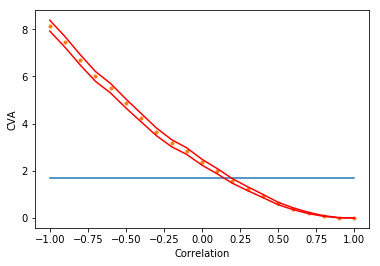

In [53]:
plt.plot(corr_tested, [uncorr_cva]*21)
plt.plot(corr_tested, cva_estimates, ".")
plt.plot(corr_tested, cva_estimates + 3*np.array(cva_std), "r")
plt.plot(corr_tested, cva_estimates - 3*np.array(cva_std), "r")
plt.xlabel("Correlation")
plt.ylabel("CVA")
plt.show()